In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, f1_score, confusion_matrix,precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [5]:
def value_of_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))  
    print('F1: ', f1_score(y_true, y_pred))
    print('Roc_AUC: ', roc_auc_score(y_true, y_pred))
    print('Confusion Matrix: ')
    print(pd.DataFrame(confusion_matrix(y_true, y_pred)))
    
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('My DataSet')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [6]:
def plot_PCA(X, y, legend = ['CHD','CON'], colors = ['r', 'g']):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [-1, 1]#TODO:проверить какой есть какой
    #colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = y == target
        ax.scatter(principalDf.loc[indicesToKeep,'principal component 1'],
                   principalDf.loc[indicesToKeep,'principal component 2'],
                   c = color,
                   s = 50)
    ax.legend(legend)
    ax.grid()
    return principalDf

In [16]:
def svc(X_train, X_test, y_train, y_test):
    clf = svm.SVC(kernel = 'linear') #polynomial kernel w df 3 is even worse
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    fold = KFold(n_splits = 5, shuffle = True, random_state = 5)
    scores = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = fold)
    print('CV:', scores.mean())
    value_of_metrics(y_test, y_pred)

After vcf decomposition:

In [6]:
df1 = pd.read_csv('./plink_results/sign_norm.ped', delim_whitespace=True, header = None)
df1

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,CHDB5403634,CHDB5403634,CHDB5403636,CHDB5403635,2,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
1,CHDB5403634,CHDB5403635,0,0,2,1,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
2,CHDB5403634,CHDB5403636,0,0,1,1,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
3,CHDB5403637,CHDB5403637,CHDB5403639,CHDB5403638,2,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
4,CHDB5403637,CHDB5403638,0,0,2,1,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,CHDB5557352,CHDB5557352,0,0,1,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
399,CHDB5557353,CHDB5557353,0,0,1,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
400,CHDB5557354,CHDB5557354,0,0,1,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
401,CHDB5571554,CHDB5571554,0,CHDB5556692,1,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G


In [7]:
features1 = df1.iloc[:, 6:]

In [8]:
features1.describe()

,6,7,8,9,10,11,12,13,14,15,...,216,217,218,219,220,221,222,223,224,225
count,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
unique,3,3,2,1,3,3,2,1,1,1,...,2,1,3,3,3,3,2,2,2,1
top,G,G,G,G,G,G,A,A,A,A,...,A,A,G,G,C,C,C,C,G,G
freq,392,392,399,403,388,390,400,403,403,403,...,400,403,397,397,395,395,401,402,400,403


Without vcf decomposition:

In [11]:
df2 = pd.read_csv('./plink_results/new/sign.ped', delim_whitespace=True, header = None)
df2

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,CHDB5403634,CHDB5403634,CHDB5403636,CHDB5403635,2,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
1,CHDB5403634,CHDB5403635,0,0,2,1,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
2,CHDB5403634,CHDB5403636,0,0,1,1,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
3,CHDB5403637,CHDB5403637,CHDB5403639,CHDB5403638,2,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
4,CHDB5403637,CHDB5403638,0,0,2,1,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,CHDB5557352,CHDB5557352,0,0,1,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
399,CHDB5557353,CHDB5557353,0,0,1,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
400,CHDB5557354,CHDB5557354,0,0,1,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G
401,CHDB5571554,CHDB5571554,0,CHDB5556692,1,2,G,G,G,G,...,A,A,G,G,C,C,C,C,G,G


In [12]:
features2 = df2.iloc[:, 6:]

In [13]:
features2.describe()

,6,7,8,9,10,11,12,13,14,15,...,156,157,158,159,160,161,162,163,164,165
count,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
unique,3,3,2,1,3,3,2,1,3,3,...,2,1,3,3,3,3,2,2,2,1
top,G,G,G,G,G,G,A,A,A,A,...,A,A,G,G,C,C,C,C,G,G
freq,392,392,399,403,388,390,400,403,398,400,...,400,403,397,397,395,395,401,402,400,403


In [14]:
X2 = pd.get_dummies(features2)

In [15]:
y = df2.iloc[:,5].replace(2, -1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

## PCA

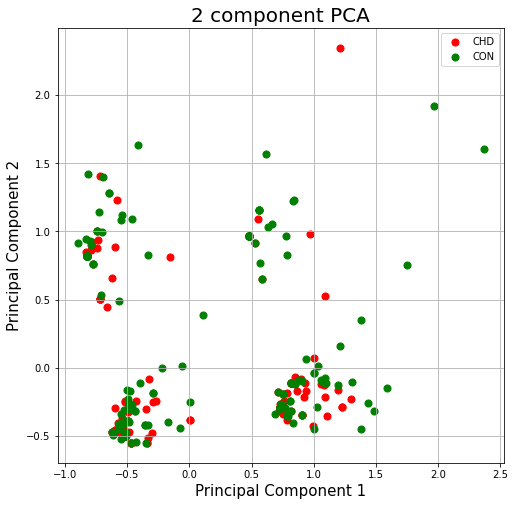

In [15]:
pca2 = plot_PCA(X2, y)

## SVM

In [101]:
params = {'kernel':['linear', 'poly'], 'C':[1,2,5,10]}
gs_svm = GridSearchCV(estimator=svm.SVC(),
                      param_grid=params,
                      scoring='roc_auc',
                      cv=5)
gs_svm.fit(X_train, y_train)
print(gs_svm.best_params_)
print('AUC: ', gs_svm.score(X_train, y_train))

{'C': 1, 'kernel': 'poly'}
AUC:  0.7456782945736433


Accuracy:  0.5925925925925926
Recall:  0.45714285714285713
Precision:  0.5333333333333333
F1:  0.4923076923076923
Roc_AUC:  0.5763975155279503
Confusion Matrix: 
    0   1
0  32  14
1  19  16


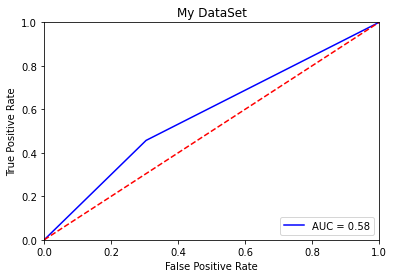

In [102]:
y_pred = gs_svm.predict(X_test)
value_of_metrics(y_test, y_pred)

In [74]:
#MInMaxScaler does not give any difference
params = [{'svm__kernel':['linear', 'poly'], 'svm__C':[1,2,3,5,10]}]
svm_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('svm', svm.SVC())])
gs_svm = GridSearchCV(estimator=svm_pipe,
                      param_grid=params,
                      scoring='roc_auc',
                      cv=5)
gs_svm.fit(X_train, y_train)
print(gs_svm.best_params_)
print('AUC: ', gs_svm.score(X_train, y_train), gs_svm.best_score_)

{'svm__C': 1, 'svm__kernel': 'poly'}
AUC:  0.7488565891472869 0.609484593837535


Accuracy:  0.5925925925925926
Recall:  0.5142857142857142
Precision:  0.5294117647058824
F1:  0.5217391304347826
Roc_AUC:  0.5832298136645963
Confusion Matrix: 
    0   1
0  30  16
1  17  18


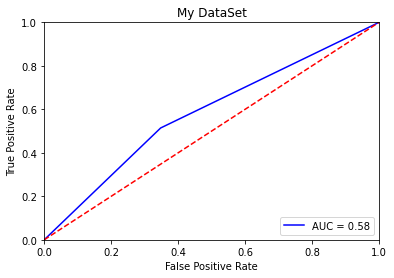

In [75]:
y_pred = gs_svm.predict(X_test)
value_of_metrics(y_test, y_pred)

CV: 0.5654326923076922
Accuracy:  0.6049382716049383
Recall:  0.6285714285714286
Precision:  0.5365853658536586
F1:  0.5789473684210527
Roc_AUC:  0.6077639751552795
Confusion Matrix: 
    0   1
0  27  19
1  13  22


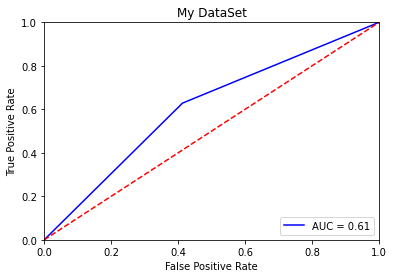

In [17]:
svc(X_train, X_test, y_train, y_test)

## Random forest

In [91]:
params = {'criterion':['gini', 'entropy'], 
          'max_depth':[3,5,7,10], 
          'max_features':['sqrt', 'log2'], 
         }

gs_rf = GridSearchCV(estimator=RandomForestClassifier(),
                      param_grid=params,
                      scoring='roc_auc',
                      cv=5)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_params_)
print('AUC: ', gs_rf.score(X_train, y_train), gs_rf.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}
AUC:  0.7796317829457364 0.630532212885154


Accuracy:  0.6790123456790124
Recall:  0.45714285714285713
Precision:  0.6956521739130435
F1:  0.5517241379310345
Roc_AUC:  0.6524844720496894
Confusion Matrix: 
    0   1
0  39   7
1  19  16


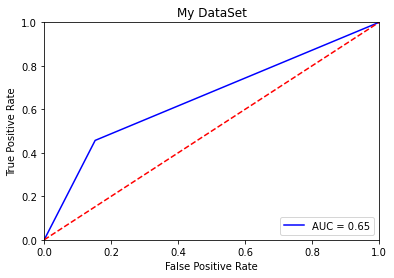

In [92]:
y_pred = gs_rf.predict(X_test)
value_of_metrics(y_test, y_pred)

Accuracy:  0.691358024691358
Recall:  0.4857142857142857
Precision:  0.7083333333333334
F1:  0.576271186440678
Roc_AUC:  0.6667701863354037
Confusion Matrix: 
    0   1
0  39   7
1  18  17


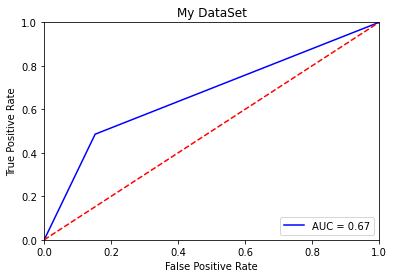

In [84]:
y_pred = gs_rf.predict(X_test)
value_of_metrics(y_test, y_pred)

In [79]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

Accuracy:  0.6172839506172839
Recall:  0.6571428571428571
Precision:  0.5476190476190477
F1:  0.5974025974025974
Roc_AUC:  0.6220496894409937
Confusion Matrix: 
    0   1
0  27  19
1  12  23


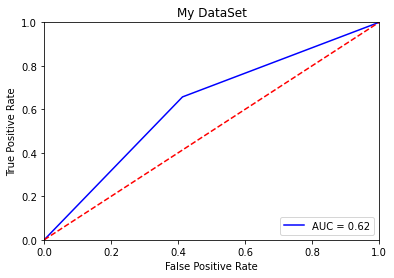

In [19]:
value_of_metrics(y_test, rfc_pred)

## Linear model

In [97]:
params = {'penalty':['l1', 'l2', 'elasticnet'], 
          'C':[0.1, 1, 3, 5], 
          'solver':['saga', 'liblinear']
         }

gs_lr = GridSearchCV(estimator=LogisticRegression(),
                      param_grid=params,
                      scoring='roc_auc',
                      cv=5)
gs_lr.fit(X_train, y_train)
print(gs_lr.best_params_)
print('AUC: ', gs_lr.score(X_train, y_train), gs_lr.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
AUC:  0.7290310077519381 0.6276526610644259


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy:  0.5925925925925926
Recall:  0.5428571428571428
Precision:  0.5277777777777778
F1:  0.5352112676056338
Roc_AUC:  0.5866459627329192
Confusion Matrix: 
    0   1
0  29  17
1  16  19


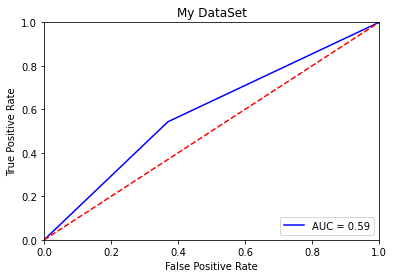

In [95]:
y_pred = gs_lr.predict(X_test)
value_of_metrics(y_test, y_pred)

Accuracy:  0.6172839506172839
Recall:  0.6
Precision:  0.5526315789473685
F1:  0.5753424657534247
Roc_AUC:  0.6152173913043479
Confusion Matrix: 
    0   1
0  29  17
1  14  21


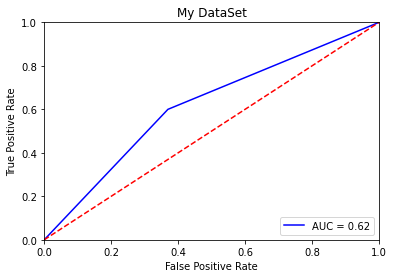

In [98]:
clf = LogisticRegression(penalty='l1', C=1, solver='liblinear')
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
value_of_metrics(y_test, clf_pred)

## *Try other positions: bigger p-values (p-value<0.001), but OBS>EXP in DFAM resulting table.*

In [23]:
df3 = pd.read_csv('C:/ngs/lpl/plink_results/new/pot.ped', delim_whitespace=True, header = None)
features3 = df3.iloc[:, 6:]
features3.describe()

,6,7,8,9,10,11,12,13,14,15,...,52,53,54,55,56,57,58,59,60,61
count,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,3,3
top,CA,CA,A,G,G,G,C,A,A,G,...,C,T,G,C,A,A,T,C,G,G
freq,356,401,202,367,227,378,289,308,292,307,...,306,316,246,358,230,380,233,350,243,366


In [24]:
df3

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,CHDB5403634,CHDB5403634,CHDB5403636,CHDB5403635,2,2,CA,CA,A,G,...,T,T,C,C,A,A,T,C,G,G
1,CHDB5403634,CHDB5403635,0,0,2,1,CA,CA,G,G,...,C,T,G,C,G,A,T,C,G,G
2,CHDB5403634,CHDB5403636,0,0,1,1,CA,CA,A,A,...,C,T,C,C,G,A,T,C,G,G
3,CHDB5403637,CHDB5403637,CHDB5403639,CHDB5403638,2,2,C,C,A,G,...,C,T,G,C,A,A,T,C,A,G
4,CHDB5403637,CHDB5403638,0,0,2,1,C,CA,G,G,...,C,C,G,G,A,A,T,T,A,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,CHDB5557352,CHDB5557352,0,0,1,2,CA,CA,A,G,...,C,T,G,C,A,A,T,C,G,G
399,CHDB5557353,CHDB5557353,0,0,1,2,CA,CA,G,G,...,C,T,C,C,A,A,C,C,G,G
400,CHDB5557354,CHDB5557354,0,0,1,2,CA,CA,G,G,...,C,T,G,C,A,A,T,T,G,G
401,CHDB5571554,CHDB5571554,0,CHDB5556692,1,2,CA,CA,G,G,...,C,T,G,C,G,A,T,C,G,G


In [25]:
X3 = pd.get_dummies(features3)
y3 = df3.iloc[:,5].replace(2, -1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

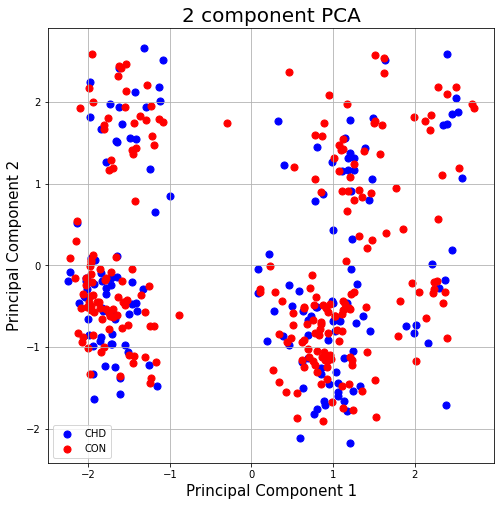

In [26]:
#sex distribution
pca3 = plot_PCA(X3, df3.iloc[:,4].replace(2, -1), colors = ['blue', 'red'])

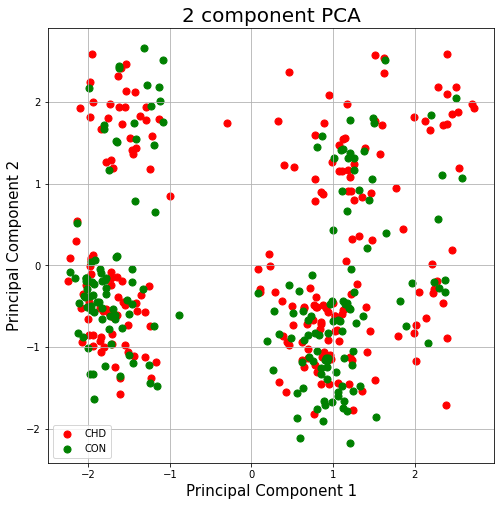

In [27]:
pca3 = plot_PCA(X3, y3)

CV: 0.5560576923076923
Accuracy:  0.5802469135802469
Recall:  0.696969696969697
Precision:  0.48936170212765956
F1:  0.575
Roc_AUC:  0.5984848484848485
Confusion Matrix: 
    0   1
0  24  24
1  10  23


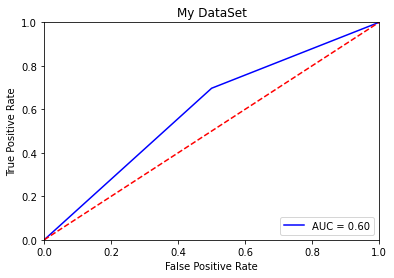

In [28]:
svc(X_train3, X_test3, y_train3, y_test3)

Accuracy:  0.5925925925925926
Recall:  0.5151515151515151
Precision:  0.5
F1:  0.5074626865671642
Roc_AUC:  0.5804924242424242
Confusion Matrix: 
    0   1
0  31  17
1  16  17


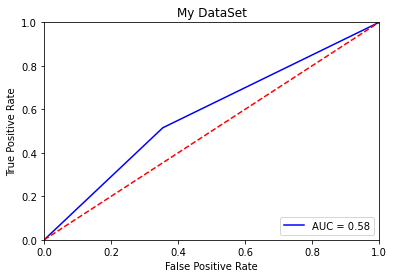

In [29]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train3, y_train3)
rfc_pred = rfc.predict(X_test3)
value_of_metrics(y_test3, rfc_pred)

In [30]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train3, y_train3)
    print('C:', c)
    #print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train3, y_train3))
    print('Test accuracy:', clf.score(X_test3, y_test3))
    print('')

C: 10
Training accuracy: 0.6987577639751553
Test accuracy: 0.6049382716049383

C: 1
Training accuracy: 0.6987577639751553
Test accuracy: 0.5925925925925926

C: 0.1
Training accuracy: 0.5279503105590062
Test accuracy: 0.5925925925925926

C: 0.001
Training accuracy: 0.5279503105590062
Test accuracy: 0.5925925925925926



Accuracy:  0.5925925925925926
Recall:  0.5151515151515151
Precision:  0.5
F1:  0.5074626865671642
Roc_AUC:  0.5804924242424242
Confusion Matrix: 
    0   1
0  31  17
1  16  17


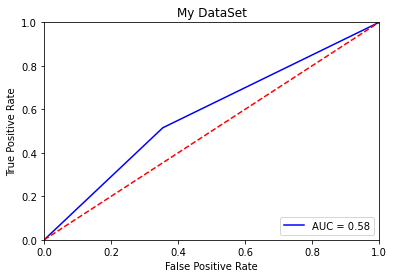

In [31]:
value_of_metrics(y_test3, rfc_pred)

## After adding the positions taken from denovo db

In [21]:
df4 = pd.read_csv('C:/ngs/lpl/plink_results/new/with_denovo.ped', delim_whitespace=True, header = None)

In [22]:
features4 = df4.iloc[:, 6:]

In [23]:
#take y from df2
(df2[1] == df4[1]).value_counts()

True    403
Name: 1, dtype: int64

In [24]:
X4 = pd.get_dummies(features4)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

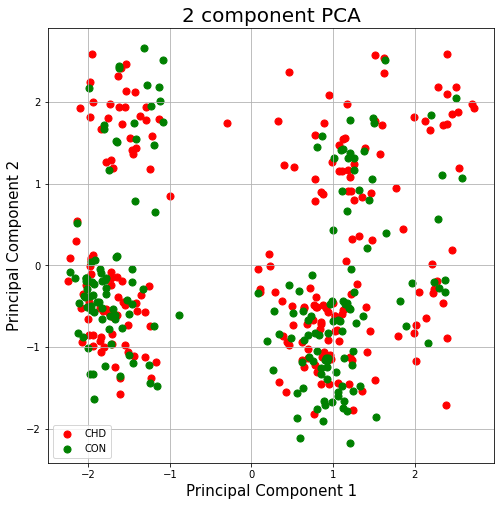

In [34]:
pca2 = plot_PCA(X4, y)

{'C': 1, 'kernel': 'linear'}
AUC:  0.7722480620155039
Accuracy:  0.6172839506172839
Recall:  0.7714285714285715
Precision:  0.54
F1:  0.6352941176470589
Roc_AUC:  0.6357142857142857
Confusion Matrix: 
    0   1
0  23  23
1   8  27


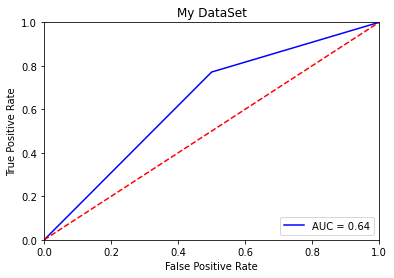

In [35]:
params = {'kernel':['linear', 'poly'], 'C':[1,2,5,10]}
gs_svm = GridSearchCV(estimator=svm.SVC(),
                      param_grid=params,
                      scoring='roc_auc',
                      cv=5)
gs_svm.fit(X_train, y_train)
print(gs_svm.best_params_)
print('AUC: ', gs_svm.score(X_train, y_train))
y_pred = gs_svm.predict(X_test)
value_of_metrics(y_test, y_pred)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2'}
AUC:  0.9037209302325582 0.6128963585434174
Accuracy:  0.5432098765432098
Recall:  0.5142857142857142
Precision:  0.47368421052631576
F1:  0.4931506849315068
Roc_AUC:  0.5397515527950311
Confusion Matrix: 
    0   1
0  26  20
1  17  18


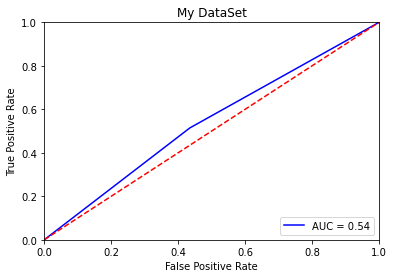

In [38]:
params = {'criterion':['gini', 'entropy'], 
          'max_depth':[3,5,6,7,8,10], 
          'max_features':['sqrt', 'log2'], 
         }
gs_rf = GridSearchCV(estimator=RandomForestClassifier(),
                      param_grid=params,
                      scoring='roc_auc',
                      cv=5)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_params_)
print('AUC: ', gs_rf.score(X_train, y_train), gs_rf.best_score_)
y_pred = gs_rf.predict(X_test)
value_of_metrics(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
AUC:  0.7505038759689923 0.614498599439776
Accuracy:  0.5679012345679012
Recall:  0.6
Precision:  0.5
F1:  0.5454545454545454
Roc_AUC:  0.5717391304347825
Confusion Matrix: 
    0   1
0  25  21
1  14  21


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_select

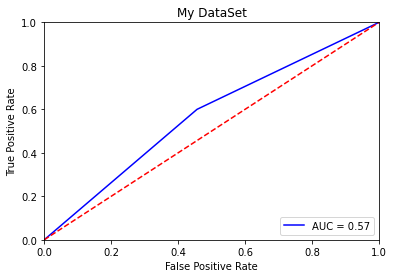

In [37]:
params = {'penalty':['l1', 'l2', 'elasticnet'], 
          'C':[0.1, 1, 3, 5], 
          'solver':['saga', 'liblinear']
         }

gs_lr = GridSearchCV(estimator=LogisticRegression(),
                      param_grid=params,
                      scoring='roc_auc',
                      cv=5)
gs_lr.fit(X_train, y_train)
print(gs_lr.best_params_)
print('AUC: ', gs_lr.score(X_train, y_train), gs_lr.best_score_)
y_pred = gs_lr.predict(X_test)
value_of_metrics(y_test, y_pred)